# Evaluación de MedSAM sobre objetos 2D alargados de acuerdo a anotación HCUCH en dataset de Gatidis
- Se seleccionó un conjunto de ... objetos 2D (componentes conectados) alargados y orientados en diagonal.
- Los objetos se seleccionaron de acuerdo su excentricidad ($e$), largo de eje major ($L$) y orientación ($\theta$). Específicamente, del total de ..., se seleccionaron aquellos que cumplen las siguientes condiciones:
    - $e \geq 0.8$
    - $35° \leq |\theta| \leq 55° $
    - $L \geq 30 ~ mm$ 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pickle
import json
from pathlib import Path

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
path_to_elongated = Path('resources') / 'elongated_objects.pkl'
path_to_performance = Path('resources') / 'performance.json'
path_to_bboxes = Path('resources') / 'bboxes.pkl'

In [4]:
labels_to_exclude = [
    ("Gonzalo", "PETCT_15a205ffcc_Segm", "1", "Higado"),
    ("Gonzalo", "PETCT_13b40a817b_Segm", "1", "derrame")
]

In [5]:
with open(path_to_elongated, 'rb') as file:
    elongated_objects = pickle.load(file)
with open(path_to_bboxes, 'rb') as file:
    bboxes = pickle.load(file)
with open(path_to_performance) as file:
    performance = json.load(file)
performance_df = pd.DataFrame(performance['bboxes'])
all_objects = [
    object_
    for annotator_dict in elongated_objects.values()
    for objects in annotator_dict.values()
    for object_ in objects
]

In [6]:
indices_to_exclude = [
    index
    for index, row in performance_df.iterrows()
    if (row['annotator'], row['study'], row['label'], row['foreground']) in labels_to_exclude
]
performance_filtered_df = performance_df.drop(indices_to_exclude)
columns_to_describe = [
    'eccentricity',
    'major_axis_length_mm',
    'orientation_deg',
    'annotated_pixels',
    'area_mm2',
    'dice_score'
]
display(performance_filtered_df.describe()[columns_to_describe])
display(performance_filtered_df.groupby('annotator').describe()[columns_to_describe])

,eccentricity,major_axis_length_mm,orientation_deg,annotated_pixels,area_mm2,dice_score
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,0.896216,64.604657,24.693235,342.009615,1418.316218,0.670213
std,0.055379,35.911837,39.182434,510.512278,2117.097916,0.233752
min,0.800026,30.139753,-54.774520,29.000000,120.263199,0.000000
25%,0.848402,39.161768,35.846044,91.000000,377.377624,0.562418
50%,0.907750,56.006154,44.748945,184.500000,765.122764,0.733607
75%,0.943416,70.163828,49.956442,346.250000,1435.901122,0.840413
max,0.990531,163.279015,54.994926,2411.000000,9998.433520,0.941538


eccentricity                                                    \
                      count      mean       std       min       25%       50%   
annotator                                                                       
Gonzalo                56.0  0.907375  0.053214  0.804212  0.863349  0.921405   
Maria Fernanda         48.0  0.883199  0.055550  0.800026  0.836177  0.873842   

                                   major_axis_length_mm                        \
                     75%       max                count       mean        std   
annotator                                                                       
Gonzalo         0.952401  0.990531                 56.0  60.249101  32.569731   
Maria Fernanda  0.931581  0.978638                 48.0  69.686140  39.191260   

                                                                        \
                      min        25%        50%        75%         max   
annotator                                                                
Gonzalo         30.356210  37.941757  49.409215  65.228835  155.357390   
Maria Fernanda  30.139753  41.082279  61.726889  77.323573  163.279015   

               orientation_deg                                              \
                         count       mean        std        min        25%   
annotator                                                                    
Gonzalo                   56.0  26.833165  37.617039 -52.531261  36.886725   
Maria Fernanda            48.0  22.196649  41.192127 -54.774520  17.872953   

                                                annotated_pixels              \
                      50%        75%        max            count        mean   
annotator                                                                      
Gonzalo         45.313130  49.988264  54.968033             56.0  230.732143   
Maria Fernanda  41.219746  48.804094  54.994926             48.0  471.833333   

                                                               area_mm2  \
                      std   min     25%    50%     75%     max    count   
annotator                                                                 
Gonzalo         331.11396  29.0   75.25  138.0  331.75  2411.0     56.0   
Maria Fernanda  641.00504  56.0  134.00  219.0  391.50  2354.0     48.0   

                                                                              \
                       mean          std         min         25%         50%   
annotator                                                                      
Gonzalo          956.847777  1373.131859  120.263199  312.062266  572.286946   
Maria Fernanda  1956.696066  2658.252292  232.232384  555.698918  908.194501   

                                         dice_score                           \
                        75%          max      count      mean       std  min   
annotator                                                                      
Gonzalo         1375.769523  9998.433520       56.0  0.616374  0.260854  0.0   
Maria Fernanda  1623.553182  9762.054129       48.0  0.733026  0.180645  0.0   

                                                        
                     25%       50%       75%       max  
annotator                                               
Gonzalo         0.516290  0.679854  0.815889  0.941538  
Maria Fernanda  0.666523  0.789654  0.854624  0.938071

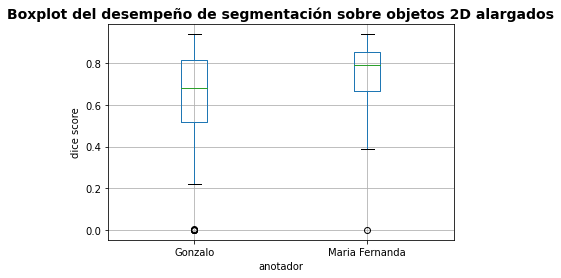

In [7]:
performance_filtered_df.boxplot(
    column='dice_score',
    by='annotator'
)
plt.xlabel('anotador')
plt.ylabel('dice score')
plt.suptitle('')
plt.title(
    'Boxplot del desempeño de segmentación sobre objetos 2D alargados',
    fontweight='bold',
    fontsize=14
)
plt.show()

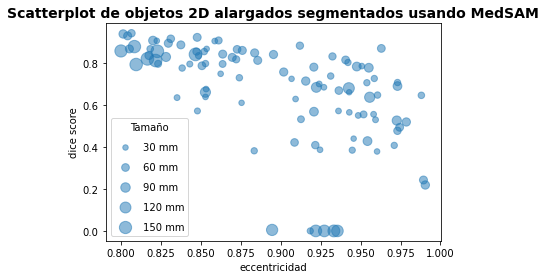

In [8]:
ax = performance_filtered_df.plot.scatter(
    x='eccentricity',
    y='dice_score',
    s='major_axis_length_mm',
    alpha=0.5
)
sizes = [30, 60, 90, 120, 150]
for size in sizes:
    ax.scatter(
        [],
        [],
        s=size,
        c='tab:blue',
        alpha=0.5,
        label=f"{size} mm")
ax.legend(title='Tamaño', scatterpoints=1, labelspacing=1.0)
ax.set_xlabel('eccentricidad')
ax.set_ylabel('dice score')
ax.set_title(
    'Scatterplot de objetos 2D alargados segmentados usando MedSAM',
    fontweight='bold',
    fontsize=14
)
plt.show()

In [9]:
performance_filtered_df['foreground'].unique()

array(['Adenopatías', 'Higado', 'Lesiones', 'Pleura',
       'adenopatiass mediastinicas y cervicales',
       'adenopatias mesentericas y retroperitoneales',
       'lesiones hepaticas'], dtype=object)